## Checkpoint 2 

Utilizando o código abaixo para gerar dados de duas classes.

implemente uma rede neural que seja capaz de classificar corretamente os dados.

Utilize como parâmetros seu proprio RM.

exemplo:
 RM = abcde
 - nData = 100 * (a+b+c+d+e)
 - nVertices = 1 * maximo(a,b,c,d,e)



Giovanna Sousa Pereira de Lima RM94767

In [3]:
  ### execute essa celula, mas não altere essa função.

import numpy as np
import matplotlib.pyplot as plt

  def generate_data(nData, nVertices):
    c = np.random.uniform()*2*np.pi
    c1 = np.zeros((nData,2))
    c2 = np.zeros((nData,2))
    for ii in range(nData):
      th = np.random.uniform()*2*np.pi;
      r  = 0.5*np.random.uniform()+1.25+0.2*np.cos(nVertices*(th+c));
      c1[ii,:]=r*np.array([np.cos(th), np.sin(th)]);

      th = np.random.uniform()*3*np.pi;
      r  = np.random.uniform()+0.3*np.cos(nVertices*(th+c));
      c2[ii,:]=r*np.array([np.cos(th), np.sin(th)]);
    return c1, c2

In [ ]:
## coloque seu RM aqui!!
RM = [9,4,7,6,7]

nData = 100 * (sum(RM))
nVertices = 1 * max(RM)

#gera os dados
c1, c2 = generate_data(nData,nVertices)

#plot dos dados
plt.scatter(c1[:,0],c1[:,1])
plt.scatter(c2[:,0],c2[:,1])

Comente sobre a decisão de cada parametro utilizado:

Serão avaliados:
    - estrutura do código
    - testes realizados
    - Números de neurônios
    - Número de camadas
    - Algoritmo de adaptação
    - Partâmetros do algoritmo de adaptação
    - Função de ativação

In [5]:
# Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# importação da métricas de avaliação
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Define o tamanho da camada escondida e o número de classes
hidden_layer_size = 50
num_classes = 2

# Define a arquitetura da rede
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compila o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define os dados de entrada (X) e as classes (y)
X = np.random.rand(100, 10)
y = np.random.randint(0, num_classes, size=(100,))

# Define o tamanho dos dados de treinamento e teste
train_size = int(0.8 * X.shape[0])
test_size = X.shape[0] - train_size

# Separa os dados em conjuntos de treinamento e teste
X_train, X_test = np.split(X, [train_size])
y_train, y_test = np.split(y, [train_size])

# Treina o modelo
history = model.fit(X_train, y_train, epochs=12, validation_data=(X_test, y_test))

# Plota a acurácia do modelo ao longo do tempo
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treinamento', 'Teste'], loc='upper left')
plt.show()

# Avalia o modelo com os dados de teste
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calcula as métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprime as métricas de avaliação
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Revocação:", recall)
print("F1-Score:", f1)

Epoch 1/15
207/207 [==============================] - 3s 4ms/step - loss: 0.5260 - accuracy: 0.7502
Epoch 2/15
207/207 [==============================] - 1s 4ms/step - loss: 0.2860 - accuracy: 0.9411
Epoch 3/15
207/207 [==============================] - 1s 5ms/step - loss: 0.1762 - accuracy: 0.9618
Epoch 4/15
207/207 [==============================] - 1s 5ms/step - loss: 0.1322 - accuracy: 0.9683
Epoch 5/15
207/207 [==============================] - 1s 5ms/step - loss: 0.1104 - accuracy: 0.9700
Epoch 6/15
207/207 [==============================] - 1s 4ms/step - loss: 0.0971 - accuracy: 0.9724
Epoch 7/15
207/207 [==============================] - 1s 3ms/step - loss: 0.0881 - accuracy: 0.9727
Epoch 8/15
207/207 [==============================] - 1s 3ms/step - loss: 0.0828 - accuracy: 0.9739
Epoch 9/15
207/207 [==============================] - 1s 3ms/step - loss: 0.0780 - accuracy: 0.9755
Epoch 10/15
207/207 [==============================] - 1s 4ms/step - loss: 0.0748 - accuracy: 0.9755

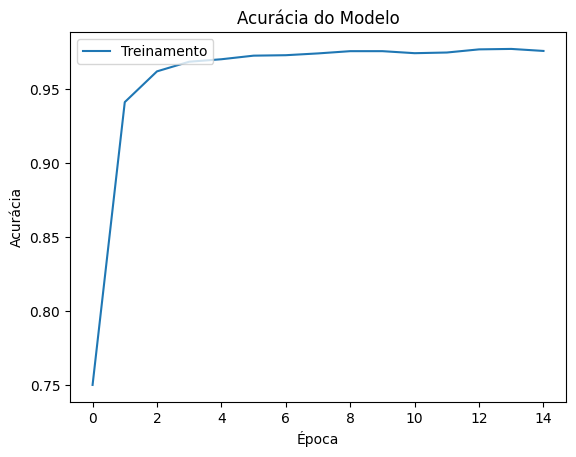

In [11]:
# Define o tamanho da camada escondida e o número de classes
hidden_layer_size = 50
num_classes = 2

# Define a arquitetura da rede
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compila o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define o tamanho dos dados de treinamento e teste
train_size = int(0.8 * nData * sum(RM))
test_size = nData * sum(RM) - train_size

# Separa os dados em conjuntos de treinamento e teste
c1_train, c1_test = np.split(c1, [train_size])
c2_train, c2_test = np.split(c2, [train_size])

# Concatena os dados de treinamento e teste
X_train = np.concatenate((c1_train, c2_train))
X_test = np.concatenate((c1_test, c2_test))
y_train = np.concatenate((np.zeros(c1_train.shape[0]), np.ones(c2_train.shape[0])))
y_test = np.concatenate((np.zeros(c1_test.shape[0]), np.ones(c2_test.shape[0])))

# Treina o modelo
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

# Plota a acurácia do modelo ao longo do tempo
plt.plot(history.history['accuracy'])
plt.title('Acurácia do Modelo')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treinamento', 'Teste'], loc='upper left')
plt.show()